In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("BX-Book-Ratings.csv", encoding= 'unicode_escape',sep=';')

In [3]:
data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
data.shape

(1149780, 3)

<AxesSubplot:>

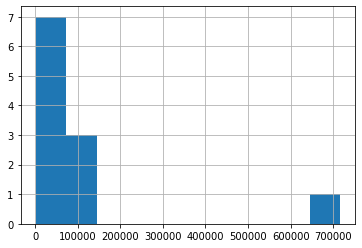

In [5]:
data["Book-Rating"].value_counts().hist()

In [6]:
data["Book-Rating"].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [9]:
#!pip3 install surprise
#!pip3 install scikit-surprise

In [10]:
from surprise import Dataset, SVD, accuracy, Reader
from surprise.model_selection import train_test_split

In [11]:
# mention the range of rating
reader = Reader(rating_scale=(0,7))

In [12]:
data = Dataset.load_from_df(data,reader)

In [13]:
trainset,testset = train_test_split(data,test_size=0.3,random_state=1)

In [14]:
svd = SVD(n_factors=200)

In [15]:
svd.fit(trainset)

In [16]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 3.4648


3.464783011120837

In [17]:
svd.predict(276725,'0155061224')

Prediction(uid=276725, iid='0155061224', r_ui=None, est=2.864944992638342, details={'was_impossible': False})